In [1]:
import sys
sys.path.append('..')

import h5py
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np
import torch
import pandas as pd
import seaborn as sns

labels = {
    'Background': 0,
    'Tubules': 1,
    # 'Vein': 2,
    'Vein / Indeterminate vessel ': 2,  # Same as Vein - relabelled
    'Artery': 3,
    'Glomeruli': 4
}

alpha = 1.0
# colors = [purple, red, green, yellow, blue]
colors = [(128/255, 0, 128/255, alpha), # purple (background)
            (1, 0, 0, alpha), # red (tubules)
            (1, 1, 0, alpha), # yellow (indeterminate)
            (0, 1, 0, alpha), # green (artery)
            (0, 0, 1, alpha)] # blue (glomeruli)
cmap = mcolors.ListedColormap(colors)

In [24]:
def plot_three(img, mask, edge_map, cmap=cmap):    
    fig, ax = plt.subplots(1, 3, figsize=(15, 5))
    ax[0].imshow(img)
    ax[0].axis('off')
    ax[0].set_title('Image')

    ax[1].imshow(mask, cmap=cmap, vmin=0, vmax=4)
    ax[1].axis('off')
    ax[1].set_title('Mask')

    ax[2].imshow(edge_map, cmap='binary')
    ax[2].axis('off')
    ax[2].set_title('Edge Map')

    plt.tight_layout()
    plt.show()

# SCHEDULERS

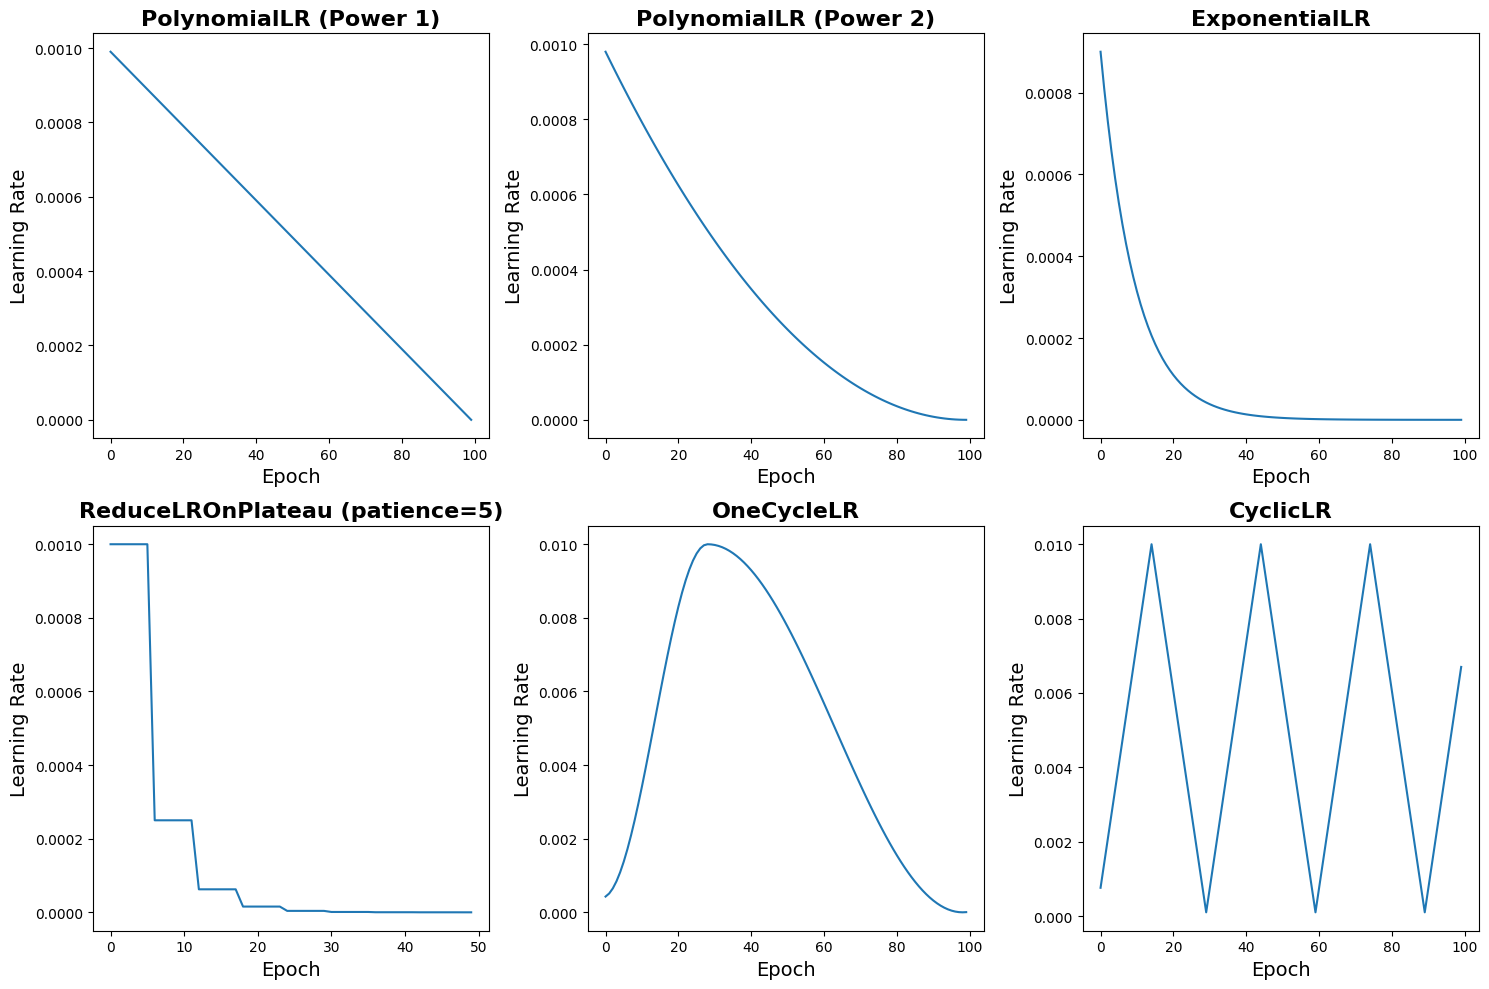

In [29]:
import torch
import torch.nn as nn
import torch.optim as optim

# Plot lr from scheduler
model_lin = nn.Linear(1, 1)
optimiser_lin = optim.AdamW(model_lin.parameters(), lr=1e-3)
scheduler_lin = optim.lr_scheduler.PolynomialLR(optimiser_lin, total_iters=100, power=1)
lrs_lin = []

for epoch in range(100):
    optimiser_lin.step()
    scheduler_lin.step()
    lrs_lin.append(optimiser_lin.param_groups[0]['lr'])

model_poly = nn.Linear(1, 1)
optimiser_poly = optim.AdamW(model_poly.parameters(), lr=1e-3)
scheduler_poly = optim.lr_scheduler.PolynomialLR(optimiser_poly, total_iters=100, power=2)
lrs_poly = []

for epoch in range(100):
    optimiser_poly.step()
    scheduler_poly.step()
    lrs_poly.append(optimiser_poly.param_groups[0]['lr'])

model_exp = nn.Linear(1, 1)
optimiser_exp = optim.AdamW(model_exp.parameters(), lr=1e-3)
scheduler_exp = optim.lr_scheduler.ExponentialLR(optimiser_exp, gamma=0.9)
lrs_exp = []

for epoch in range(100):
    optimiser_exp.step()
    scheduler_exp.step()
    lrs_exp.append(optimiser_exp.param_groups[0]['lr'])

model_plateau = nn.Linear(1, 1)
optimiser_plateau = optim.AdamW(model_plateau.parameters(), lr=1e-3)
scheduler_plateau = optim.lr_scheduler.ReduceLROnPlateau(optimiser_plateau, mode='min', factor=0.25, patience=5)
lrs_plateau = []

for epoch in range(50):
    optimiser_plateau.step()
    scheduler_plateau.step(epoch)
    lrs_plateau.append(optimiser_plateau.param_groups[0]['lr'])

model_onecycle = nn.Linear(1, 1)
optimiser_onecycle = optim.AdamW(model_onecycle.parameters(), lr=1e-3)
scheduler_onecycle = optim.lr_scheduler.OneCycleLR(optimiser_onecycle, max_lr=1e-2, total_steps=100)
lrs_onecycle = []

for epoch in range(100):
    optimiser_onecycle.step()
    scheduler_onecycle.step()
    lrs_onecycle.append(optimiser_onecycle.param_groups[0]['lr'])

model_cyclic = nn.Linear(1, 1)
optimiser_cyclic = optim.AdamW(model_cyclic.parameters(), lr=1e-2)
scheduler_cyclic = optim.lr_scheduler.CyclicLR(optimiser_cyclic, base_lr=1e-4, max_lr=1e-2, step_size_up=15)
lrs_cyclic = []

for epoch in range(100):
    optimiser_cyclic.step()
    scheduler_cyclic.step()
    lrs_cyclic.append(optimiser_cyclic.param_groups[0]['lr'])

fig, ax = plt.subplots(2, 3, figsize=(15, 10))
ax[0, 0].plot(lrs_lin)
ax[0, 0].set_title('PolynomialLR (Power 1)', fontsize=16, fontweight='bold')
ax[0, 0].set_xlabel('Epoch', fontsize=14)
ax[0, 0].set_ylabel('Learning Rate', fontsize=14)

ax[0, 1].plot(lrs_poly)
ax[0, 1].set_title('PolynomialLR (Power 2)', fontsize=16, fontweight='bold')
ax[0, 1].set_xlabel('Epoch', fontsize=14)
ax[0, 1].set_ylabel('Learning Rate', fontsize=14)

ax[0, 2].plot(lrs_exp)
ax[0, 2].set_title('ExponentialLR', fontsize=16, fontweight='bold')
ax[0, 2].set_xlabel('Epoch', fontsize=14)
ax[0, 2].set_ylabel('Learning Rate', fontsize=14)

ax[1, 0].plot(lrs_plateau)
ax[1, 0].set_title('ReduceLROnPlateau (patience=5)', fontsize=16, fontweight='bold')
ax[1, 0].set_xlabel('Epoch', fontsize=14)
ax[1, 0].set_ylabel('Learning Rate', fontsize=14)

ax[1, 1].plot(lrs_onecycle)
ax[1, 1].set_title('OneCycleLR', fontsize=16, fontweight='bold')
ax[1, 1].set_xlabel('Epoch', fontsize=14)
ax[1, 1].set_ylabel('Learning Rate', fontsize=14)

ax[1, 2].plot(lrs_cyclic)
ax[1, 2].set_title('CyclicLR', fontsize=16, fontweight='bold')
ax[1, 2].set_xlabel('Epoch', fontsize=14)
ax[1, 2].set_ylabel('Learning Rate', fontsize=14)

plt.tight_layout()

plt.savefig('schedulers.png', format='png', dpi=300, bbox_inches='tight', pad_inches=0.1)
plt.show()
